In [22]:
!pip install scikit-learn

In [24]:
!pip install --upgrade yfinance

Importing Libraries:

In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

Dowloading Live Stock Data 

In [33]:
Data = yf.download('NVDA' , start='2022-01-01' , end = '2025-04-23')
Data.info()
#Preview Data

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 828 entries, 2022-01-03 to 2025-04-22
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   828 non-null    float64
 1   (High, NVDA)    828 non-null    float64
 2   (Low, NVDA)     828 non-null    float64
 3   (Open, NVDA)    828 non-null    float64
 4   (Volume, NVDA)  828 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 38.8 KB


In [35]:
Data.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2022-01-03,30.068220,30.657186,29.732808,29.762757,391547000
2022-01-04,29.238680,30.414615,28.299329,30.223950,527154000
2022-01-05,27.555632,29.364457,27.484757,28.898274,498064000
2022-01-06,28.128628,28.388172,27.017579,27.591570,454186000
2022-01-07,27.199257,28.372199,27.009589,28.091691,409939000


Cleaning and Preparing the Data

In [44]:
#Using only the closing prices
Data = Data[['Close']].dropna()

#adding a new colums for 'Days' since the start Date
Data['Days'] = (Data.index - Data.index[0]).days

Plotting the Data

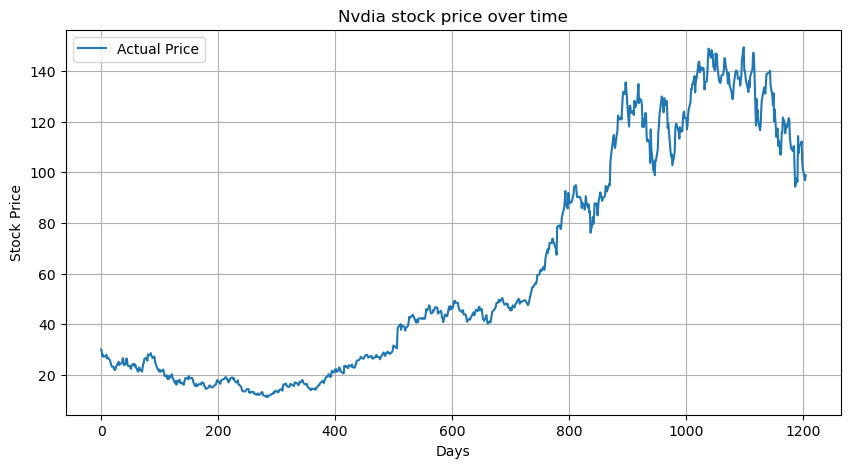

In [53]:
plt.figure(figsize = (10,5))
plt.plot(Data['Days'] , Data['Close'], label = 'Actual Price')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Nvdia stock price over time')
plt.legend()
plt.grid(True)
plt.show()

Training the simple Linear Regression Model

In [58]:
#Prepare features and target

X = Data[['Days']]
y = Data[['Close']]

#creating and fitting the model

model = LinearRegression()
model.fit(X , y )

LinearRegression()

Predicting the NEXT 30 days 

D:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


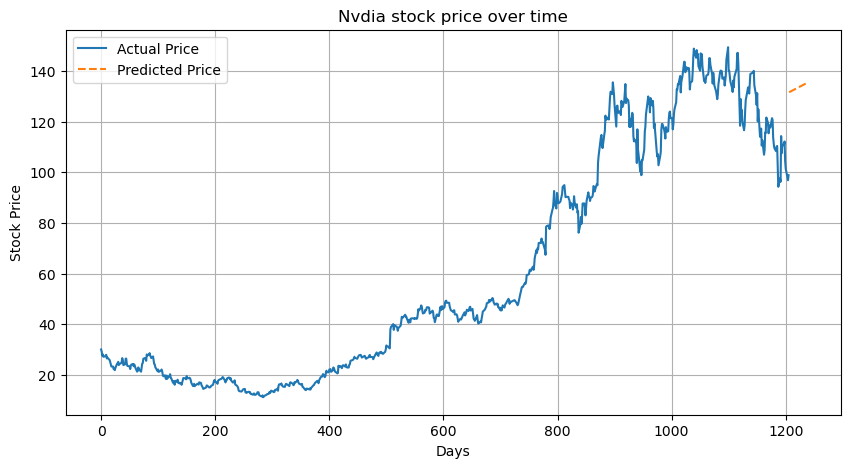

In [63]:
#Predicting the Next 30 days
future_days = pd.DataFrame({'Days': range(Data['Days'].max()+1, Data['Days'].max()+31)})
future_prices = model.predict(future_days)

#Plot the Prediction
plt.figure(figsize=(10,5))
plt.plot(Data['Days'] , Data['Close'], label = 'Actual Price')
plt.plot(future_days , future_prices , label = 'Predicted Price', linestyle= '--' )
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Nvdia stock price over time')
plt.legend()
plt.grid(True)
plt.show()
